## Softmax

In [5]:
import numpy as np
import gensim
import jieba

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

## 对数据进行预处理

In [3]:
import re
import sys
import jieba
from gensim.models import word2vec
import logging

In [43]:
def clean_file(input_file):
    lines = []
    p1 = re.compile(u'-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-')
    p2 = re.compile(u'[（\(][，；。？！\s]*[）\)]')
    p3 = re.compile(u'[「『]')
    p4 = re.compile(u'[」』]')
    for file in input_file:
        with open(file) as f:
            n_lines = f.readlines()
            for line in n_lines:
                if 'zh.wikipedia.org' in line:
                    continue
                line = p1.sub(u'\2', line)
                line = p2.sub(u'', line)
                line = p3.sub(u'“', line)
                line = p4.sub(u'”', line)
                line = line.replace('</>', '')
                line = re.sub('[a-zA-Z0-9]','',line)
                if '\n' == line:
                        continue
                elif line == '</>':
                    continue
                lines.append(line)
            print(len(lines))
    return lines

def write_file(lines):
    outfile = open('clean_text.txt', 'w')
    for line in lines:
        token = jieba.cut(line, cut_all=True)
        line = ' '.join(token)
        outfile.write(line)
    outfile.close()

In [31]:
lines = clean_file(['/home/xu/2019-summer/assignments/zhwiki/AA/wiki_00_jian', 
                    '/home/xu/2019-summer/assignments/zhwiki/AA/wiki_01_jian'])


5162897
6577915


In [39]:
write_file(lines)

In [40]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.LineSentence(u'/home/xu/2019-summer/assignments/clean_text.txt')
model = word2vec.Word2Vec(sentences,size=200,window=5,min_count=5)
outp1 = 'wiki.zh.text.model'
outp2 = 'wiki.zh.text.vector'
model.save(outp1)
model.wv.save_word2vec_format(outp2, binary=False)

2019-07-31 16:02:17,173 : INFO : collecting all words and their counts
/home/xu/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-07-31 16:02:17,176 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-07-31 16:02:17,362 : INFO : PROGRESS: at sentence #10000, processed 929735 words, keeping 65297 word types
2019-07-31 16:02:17,521 : INFO : PROGRESS: at sentence #20000, processed 1711014 words, keeping 86240 word types
2019-07-31 16:02:17,696 : INFO : PROGRESS: at sentence #30000, processed 2548011 words, keeping 102147 word types
2019-07-31 16:02:17,853 : INFO : PROGRESS: at sentence #40000, processed 3294819 words, keeping 112692 word types
2019-07-31 16:0

### Load Model

In [6]:
model = gensim.models.Word2Vec.load('wiki.zh.text.model')

/home/xu/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [22]:
similary_words = model.wv.most_similar('微软', topn=300)

In [30]:
import matplotlib
matplotlib.matplotlib_fname()

'/home/xu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [7]:
# -*- coding:utf-8 -*-
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


plt.rc('font', family='SimHei', size=13)

In [8]:
def tsne_plot(model, keyword, k):
    labels = []
    tokens = []
    similar_words = model.wv.most_similar(keyword, topn=k)
    
    for word in similar_words:
        tokens.append(model[word[0]])
        labels.append(word[0])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.title(u'与' +  keyword + '最接近的' + str(k) + '个词')
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/xu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


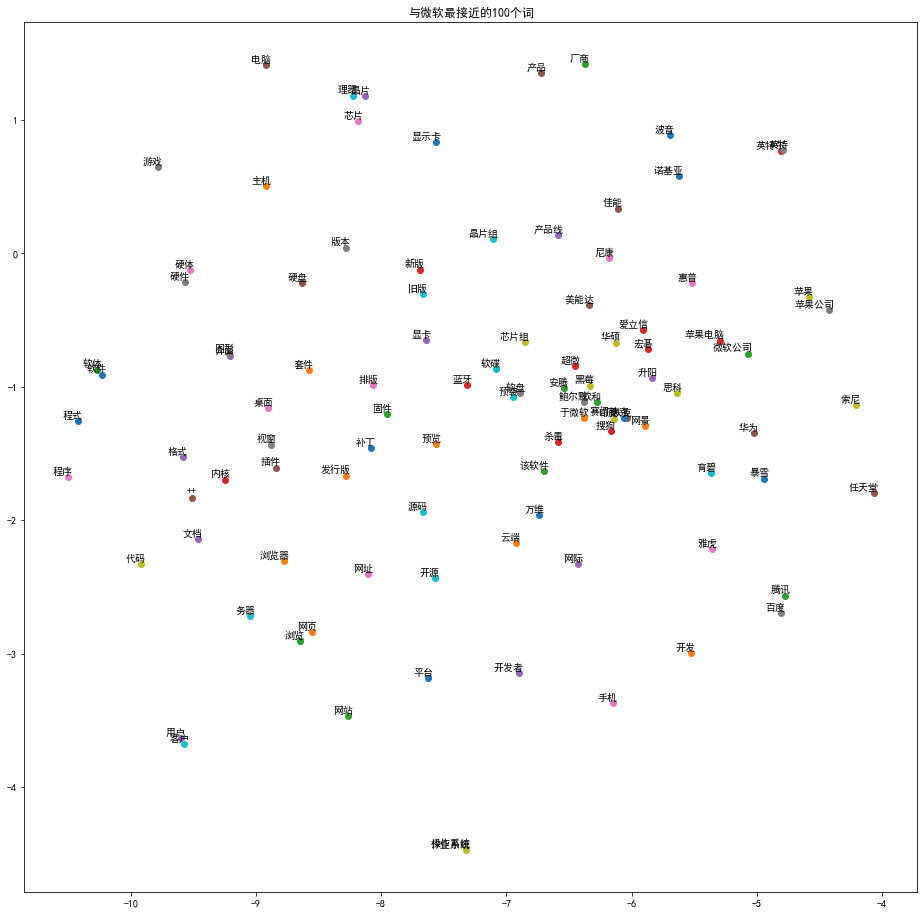

In [9]:
tsne_plot(model, '微软', 100)